<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 155.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 178.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 97.1 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

df.drop(['Check', 'CodingActivities'], axis=1, inplace=True)
df['JobSat'].fillna(df['JobSat'].value_counts().idxmax(), inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].value_counts().idxmax(), inplace=True)
df['EdLevel'].fillna(df['EdLevel'].value_counts().idxmax(), inplace=True)
df['YearsCode'].fillna(df['YearsCode'].value_counts().idxmax(), inplace=True)
df['YearsCodePro'].fillna(df['YearsCodePro'].value_counts().idxmax(), inplace=True)
df['CompTotal'].fillna(df['CompTotal'].astype('float').mean(axis=0), inplace=True)
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].astype('float').mean(axis=0), inplace=True)

/tmp/ipykernel_300/3412327246.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].value_counts().idxmax(), inplace=True)
/tmp/ipykernel_300/3412327246.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
df.replace({'YearsCodePro': 'Less than 1 year'}, {'YearsCodePro': '0.5'}, inplace=True)
df.replace({'YearsCodePro': 'More than 50 years'}, {'YearsCodePro': '51'}, inplace=True)

In [5]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].astype('float')
bins = np.linspace(min(df['YearsCodePro']), max(df['YearsCodePro']), 5)
Nam_Years = ['0-5', '5-10', '10-20', '>20']
df['Bin_YearsCodePro'] = pd.cut(df['YearsCodePro'], bins, labels=Nam_Years, include_lowest=True)

/tmp/ipykernel_300/1251037300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_job_sat = df.groupby('Bin_YearsCodePro')['JobSat'].mean()


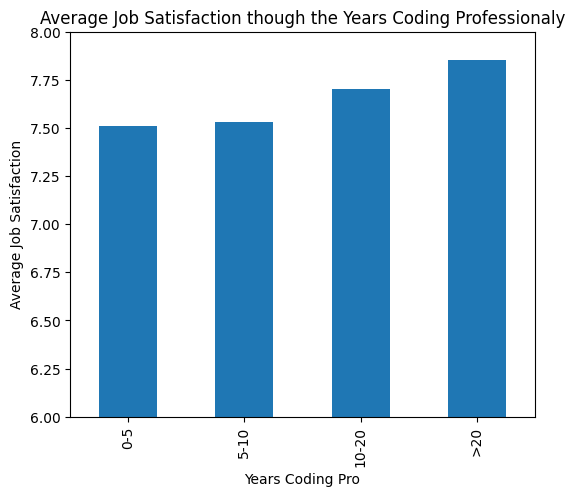

In [6]:
avg_job_sat = df.groupby('Bin_YearsCodePro')['JobSat'].mean()
plt.figure(figsize=(6,5))
avg_job_sat.plot(kind='bar', ylim=[6, 8])
plt.title('Average Job Satisfaction though the Years Coding Professionaly')
plt.xlabel('Years Coding Pro')
plt.ylabel('Average Job Satisfaction')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


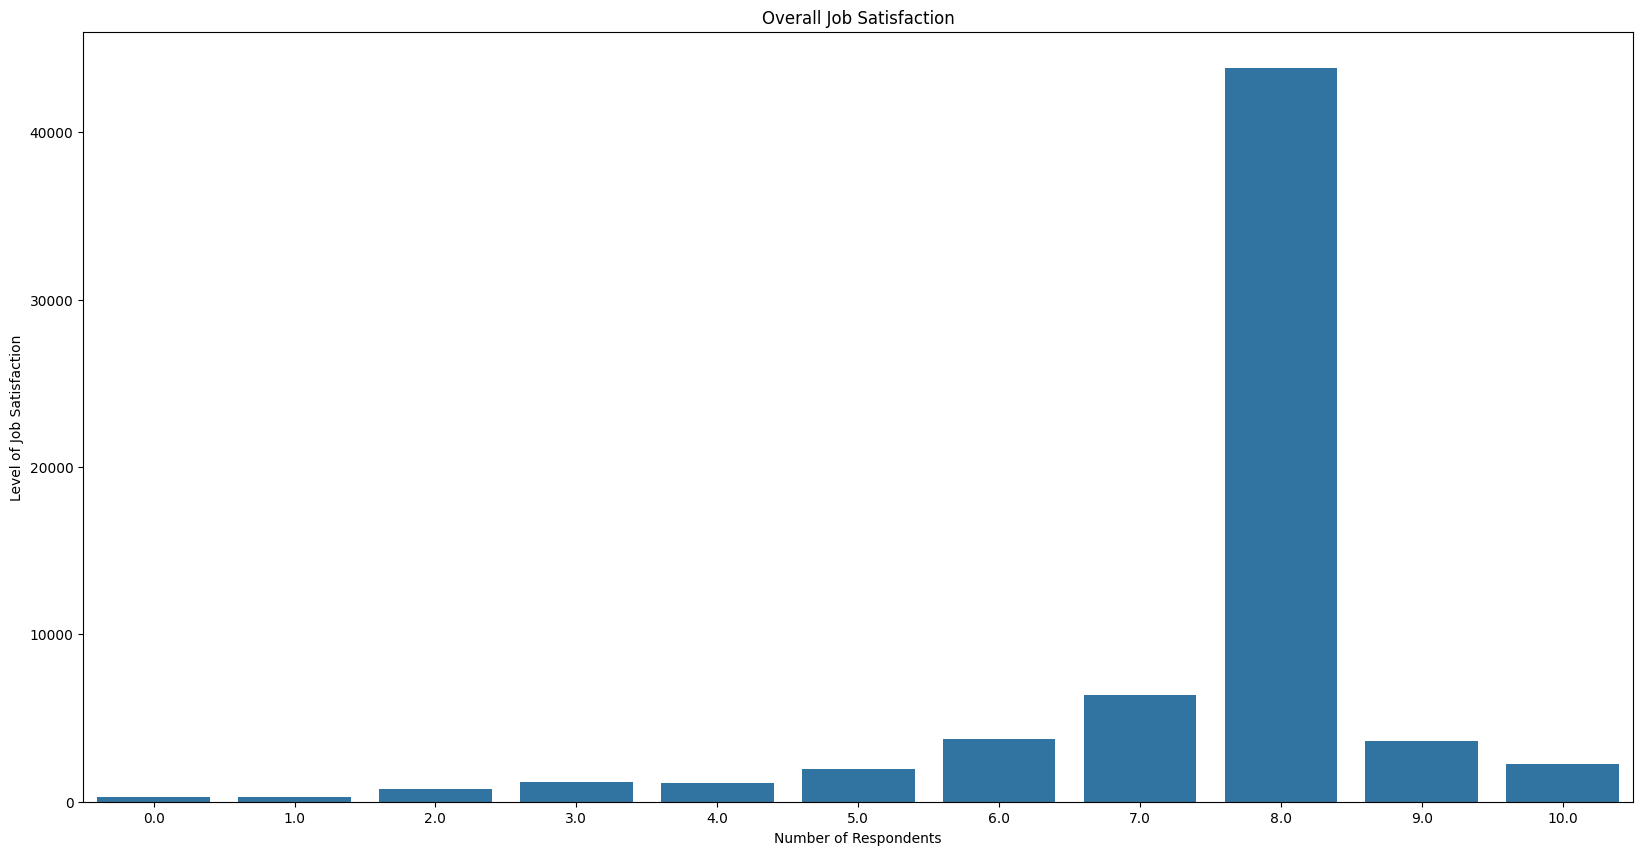

In [7]:
## Write your code here
plt.figure(figsize=(20,10))
sns.countplot(df, x='JobSat')
plt.title('Overall Job Satisfaction')
plt.xlabel('Number of Respondents')
plt.ylabel('Level of Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


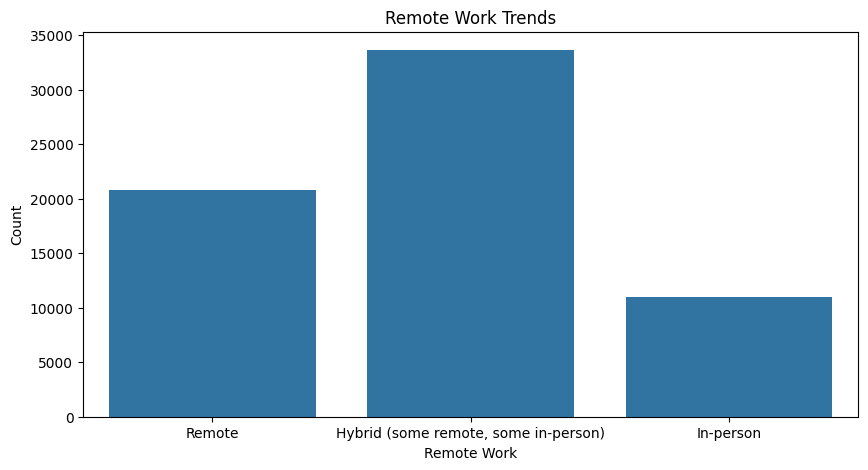

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(df, x='RemoteWork')
plt.title('Remote Work Trends')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

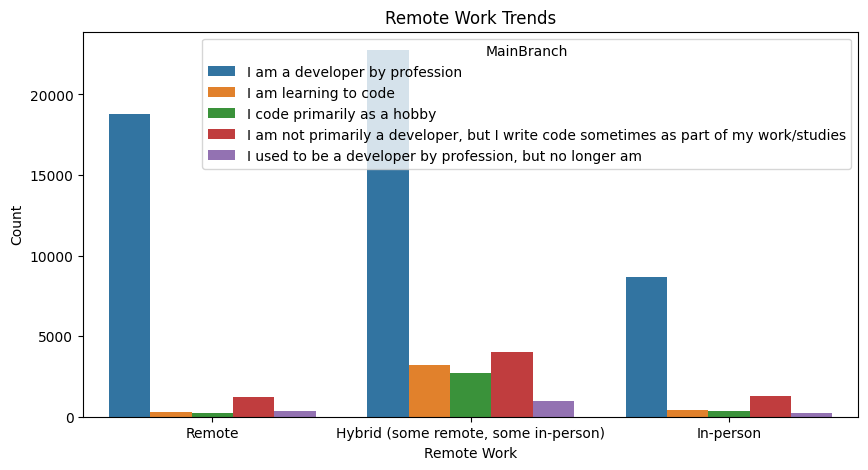

In [9]:
## Write your code here
plt.figure(figsize=(10, 5))
sns.countplot(df, x='RemoteWork', hue='MainBranch')
plt.title('Remote Work Trends')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

In [10]:
cross_tab1 = pd.crosstab(index=[df["RemoteWork"]],
                       columns=[df["MainBranch"]],
                       margins=True) 

cross_tab1

MainBranch,I am a developer by profession,I am learning to code,"I am not primarily a developer, but I write code sometimes as part of my work/studies",I code primarily as a hobby,"I used to be a developer by profession, but no longer am",All
RemoteWork,,,,,,
"Hybrid (some remote, some in-person)",22751,3198,4002,2732,963,33646
In-person,8697,412,1289,351,211,10960
Remote,18759,265,1220,251,336,20831
All,50207,3875,6511,3334,1510,65437


In [11]:
cross_tab2 = pd.crosstab(index=[df["RemoteWork"]],
                       columns=[df["JobSat"]],
                       margins=True)
cross_tab2

JobSat,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
RemoteWork,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",107,109,310,481,472,836,1726,2849,24373,1509,874,33646
In-person,100,75,170,269,261,450,731,1172,6778,587,367,10960
Remote,104,92,292,415,397,670,1294,2358,12669,1530,1010,20831
All,311,276,772,1165,1130,1956,3751,6379,43820,3626,2251,65437


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [12]:
df["LanguageHaveWorkedWith"].isna().sum()

np.int64(5692)

In [13]:
df["LanguageHaveWorkedWith"].value_counts().head(100)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                     1002
Python                                                              832
HTML/CSS;JavaScript;PHP;SQL                                         503
C#                                                                  452
HTML/CSS;JavaScript                                                 452
                                                                   ... 
C#;Python;SQL                                                        63
JavaScript;PHP                                                       63
Bash/Shell (all shells);HTML/CSS;Java;JavaScript;SQL;TypeScript      62
Bash/Shell (all shells);Java;SQL                                     62
Java;JavaScript;Python                                               61
Name: count, Length: 100, dtype: int64

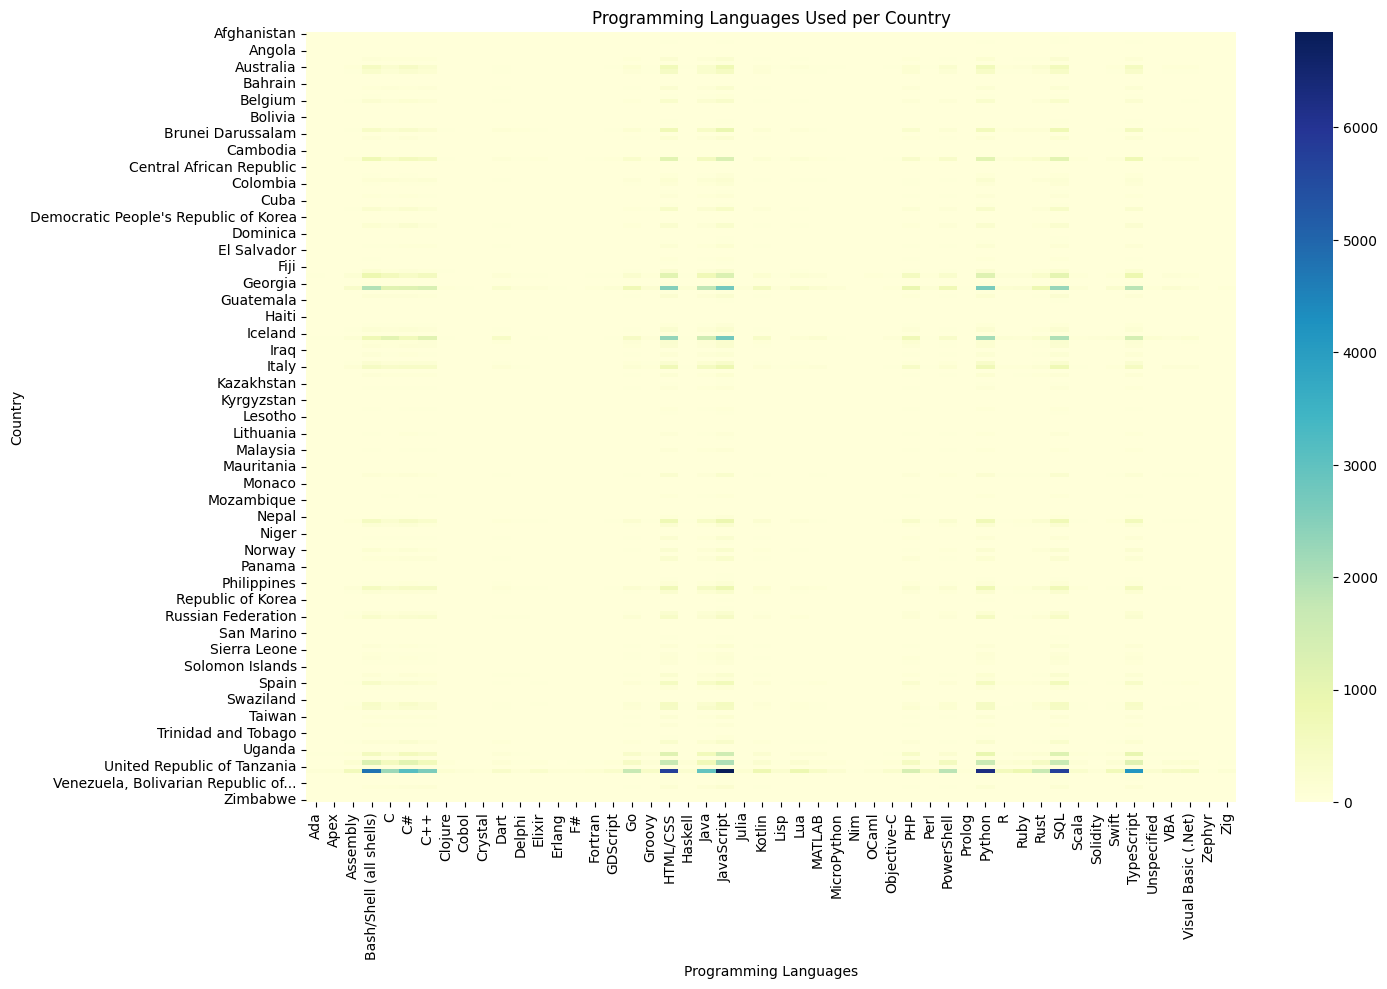

In [14]:
## Write your code here
df["LanguageHaveWorkedWith_clean"] = df["LanguageHaveWorkedWith"].fillna("Unspecified")

df["Lang_list"] = df["LanguageHaveWorkedWith_clean"].str.split(";")

df_exploded = df.explode("Lang_list")

df_exploded["Lang_list"] = df_exploded["Lang_list"].str.strip()

lang_crosstab = pd.crosstab(df_exploded["Country"], df_exploded["Lang_list"])

plt.figure(figsize=(15, 10))

sns.heatmap(lang_crosstab,
           annot=False,
           cmap="YlGnBu")

plt.title("Programming Languages Used per Country")
plt.ylabel("Country")
plt.xlabel("Programming Languages")

plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [15]:
## Write your code here
df["JobSatPoints_1"].isna().sum()

np.int64(36113)

In [16]:
df["JobSatPoints_1"].describe()

count    29324.000000
mean        18.581094
std         25.966221
min          0.000000
25%          0.000000
50%         10.000000
75%         22.000000
max        100.000000
Name: JobSatPoints_1, dtype: float64

In [17]:
df["YearsCodePro"].describe()

count    65437.000000
mean         8.476794
std          8.732454
min          0.500000
25%          2.000000
50%          5.000000
75%         12.000000
max         51.000000
Name: YearsCodePro, dtype: float64

In [18]:
df["YearsCodePro"].unique()

array([ 2. , 17. , 27. ,  7. , 11. , 25. , 12. , 10. ,  3. ,  0.5, 18. ,
       37. , 15. , 20. ,  6. , 16. ,  8. , 14. ,  4. , 45. ,  1. , 24. ,
       29. ,  5. , 30. , 26. ,  9. , 33. , 13. , 35. , 23. , 22. , 31. ,
       19. , 21. , 28. , 34. , 32. , 40. , 50. , 39. , 44. , 42. , 41. ,
       36. , 38. , 51. , 43. , 47. , 48. , 46. , 49. ])

In [21]:
plot_df = df[["YearsCodePro", "JobSatPoints_1"]].dropna()

plot_df

,YearsCodePro,JobSatPoints_1
1,17.0,0.0
10,2.0,50.0
12,12.0,0.0
15,27.0,0.0
18,10.0,10.0
...,...,...
65178,17.0,0.0
65218,2.0,0.0
65265,2.0,20.0
65351,7.0,0.0


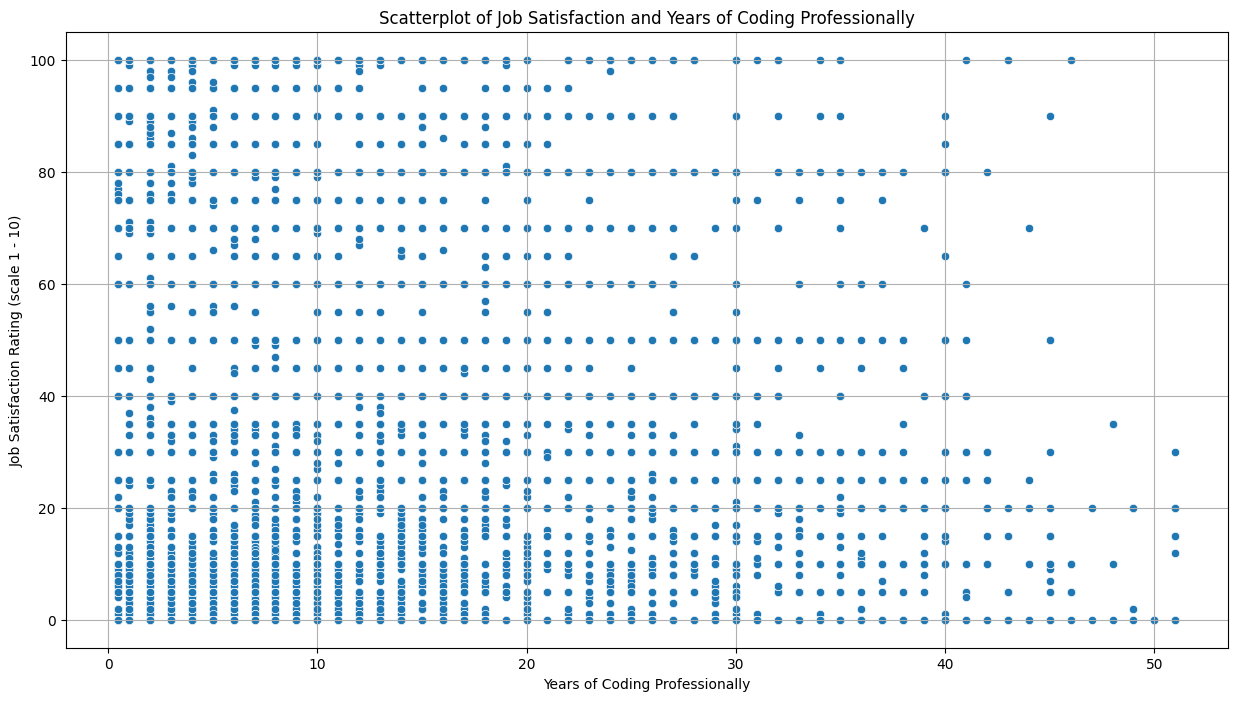

In [22]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=plot_df, x="YearsCodePro", y="JobSatPoints_1")

plt.title("Scatterplot of Job Satisfaction and Years of Coding Professionally")
plt.xlabel("Years of Coding Professionally")
plt.ylabel("Job Satisfaction Rating (scale 1 - 10)")
plt.grid(True)

plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [23]:
## Write your code here
df["EdLevel"].isna().sum()

np.int64(0)

In [24]:
df["EdLevel"].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else'],
      dtype=object)

In [25]:
df["EdLevel"].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29595
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

In [26]:
df["Employment"].value_counts()

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [28]:
crosstabEducEmp = pd.crosstab(df["EdLevel"], df["Employment"], margins=True)

crosstabEducEmp

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Not employed, and not looking for work","Employed, full-time;Not employed, but looking for work","Employed, full-time;Not employed, but looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Retired","Employed, full-time;Student, full-time","Employed, full-time;Student, full-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time","Employed, full-time;Student, full-time;Not employed, but looking for work;Student, part-time;Employed, part-time","Employed, full-t

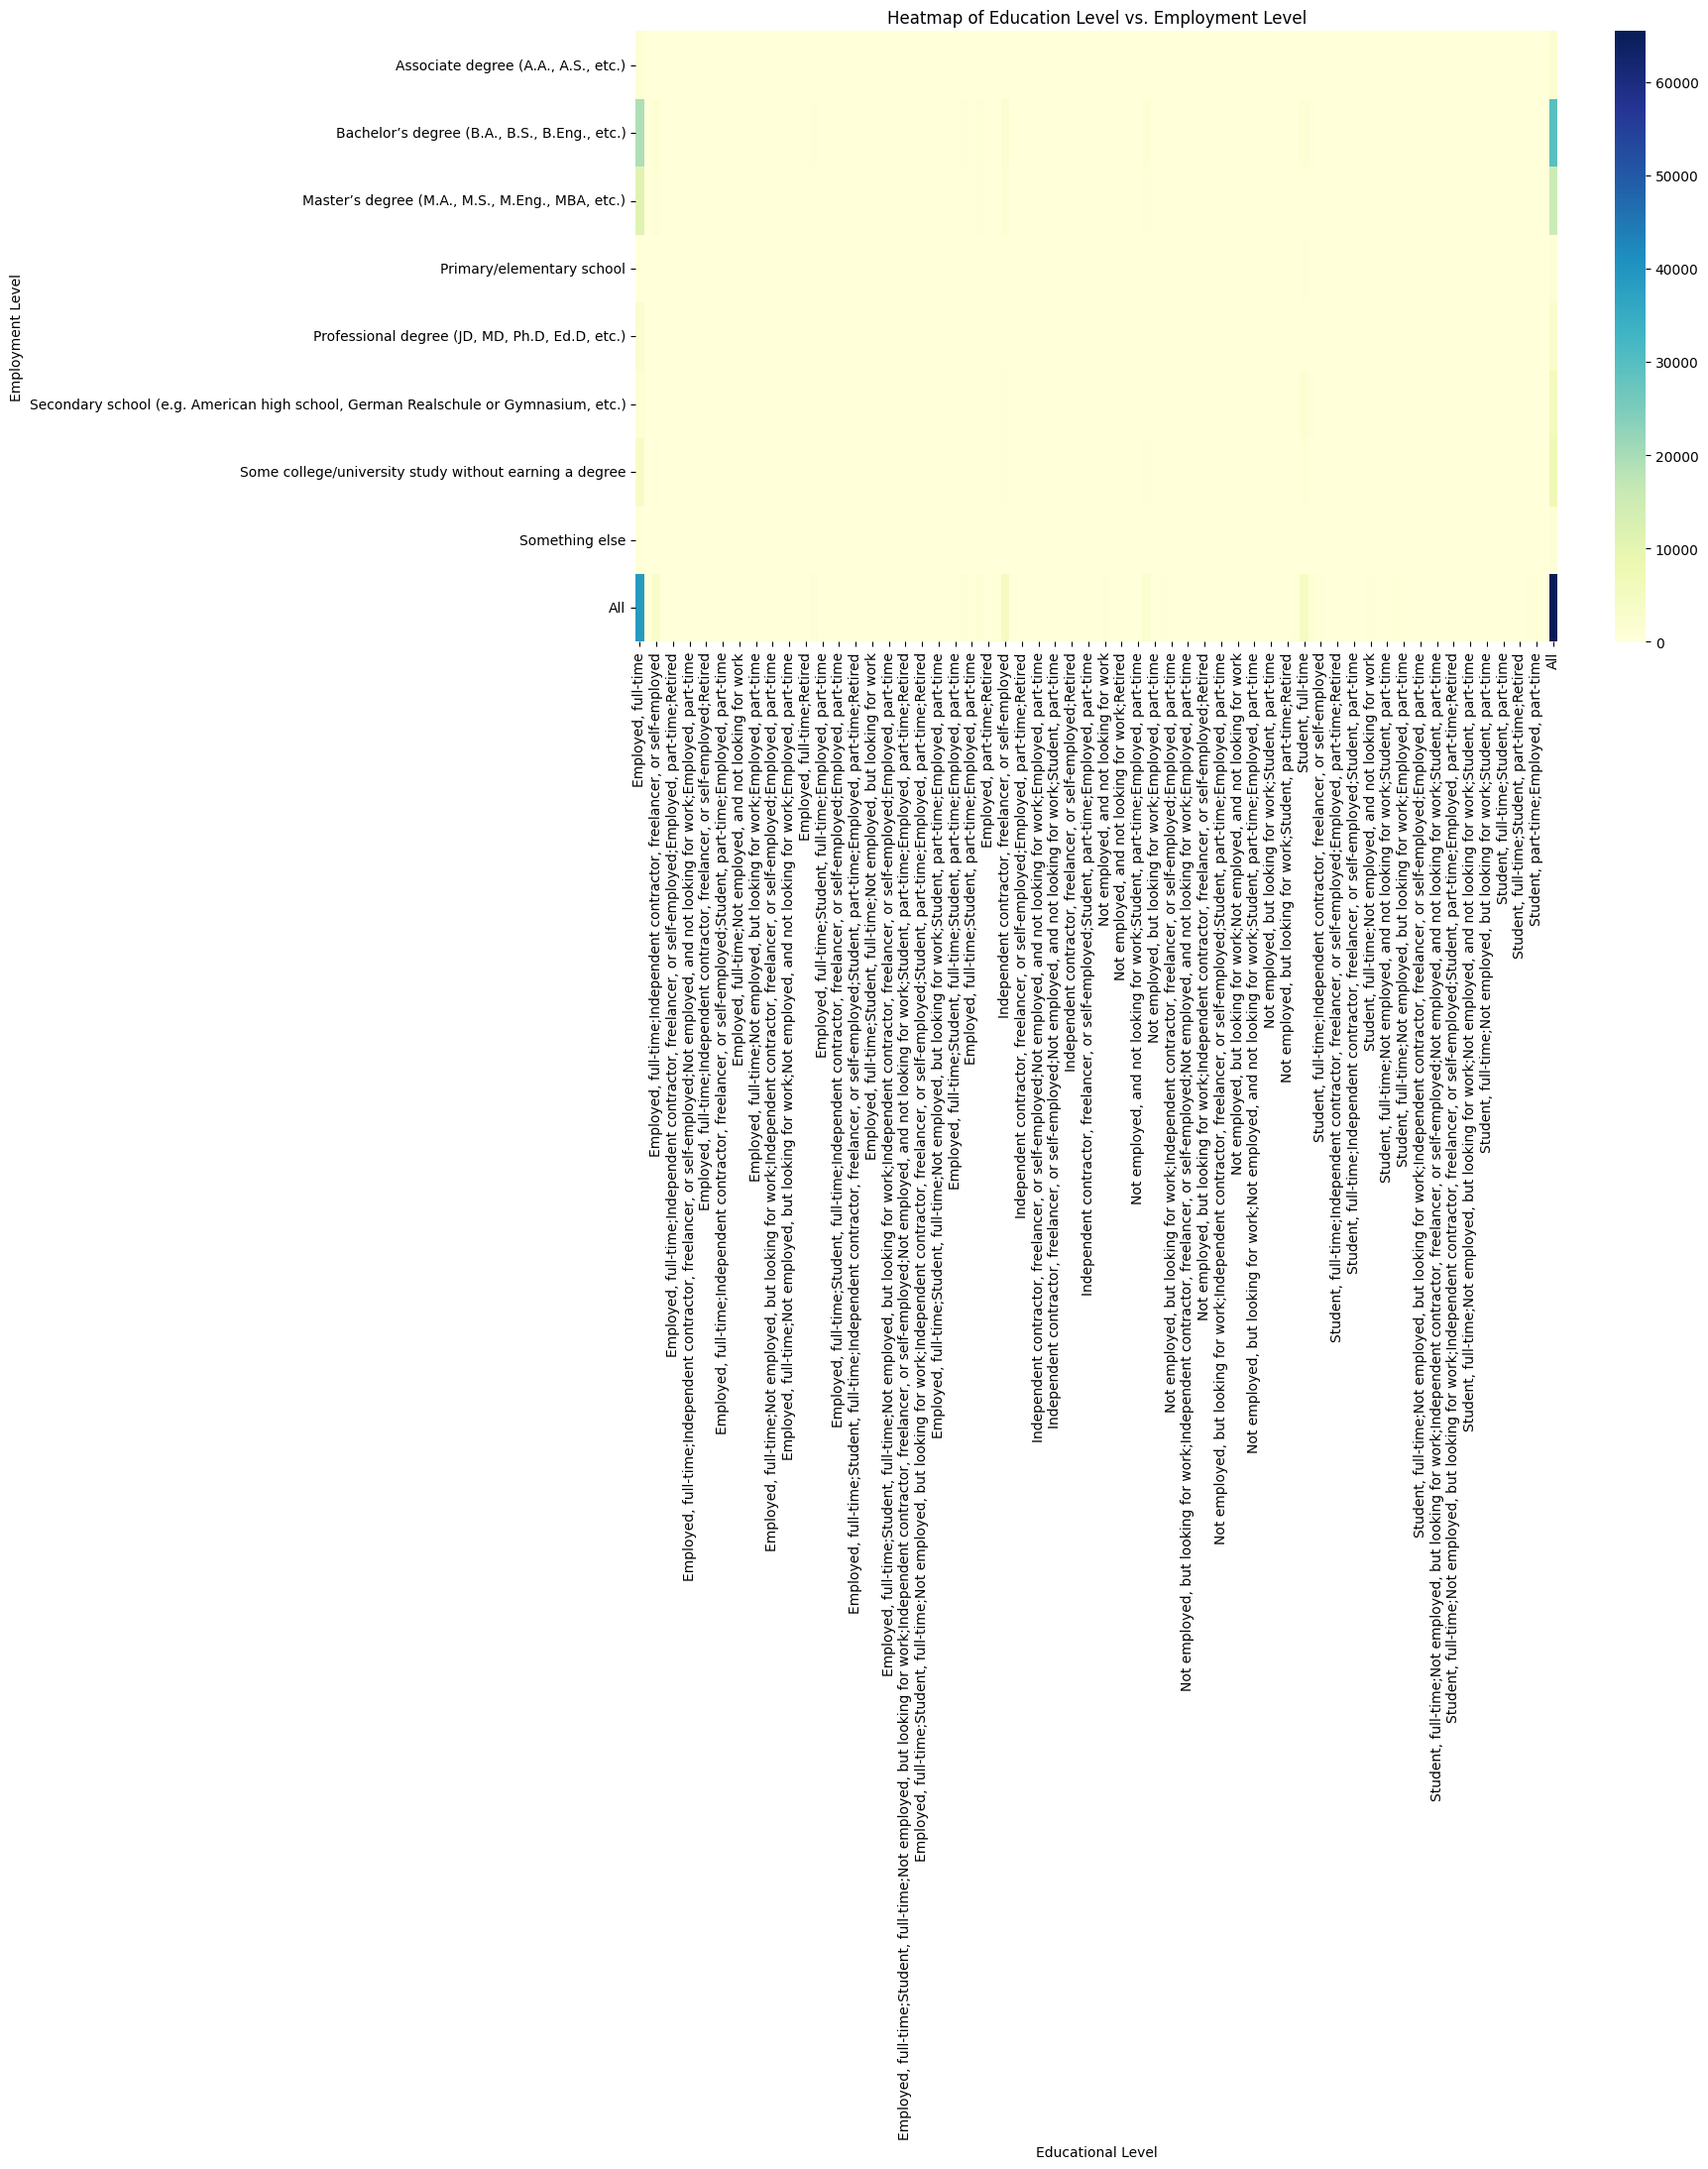

In [30]:
plt.figure(figsize=(15, 8))

sns.heatmap(crosstabEducEmp, cmap="YlGnBu")

plt.title("Heatmap of Education Level vs. Employment Level")
plt.xlabel("Educational Level")
plt.ylabel("Employment Level") 

plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [31]:
## Write your code here
df.to_csv('ModifiedDF.csv')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
